In [7]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from scipy.fft import rfft,fft, ifft, fftshift, fftfreq

In [8]:
# Charger les données
data = np.load("Plot/resultats_multi_dt_lin2025-06-07 17:45:10.127783.npz", allow_pickle=True)


In [9]:
print(data)
#print(data['dt_values'])
dt_values = data['dt_values']
#print('dt',type(dt_values))
amplitudes = data['amplitudes']
#l_sup_10_pop = data['l_sup_10_pop'].item()

l3_pop = data['l3_pop'].item()

NpzFile 'Plot/resultats_multi_dt_lin2025-06-07 17:45:10.127783.npz' with keys: dt_values, amplitudes, l0_pop, l1_pop, l2_pop...


NpzFile 'Plot/resultats_multi_dt_lin2025-06-07 17:45:10.127783.npz' with keys: dt_values, amplitudes, l0_pop, l1_pop, l2_pop...
len= 1500


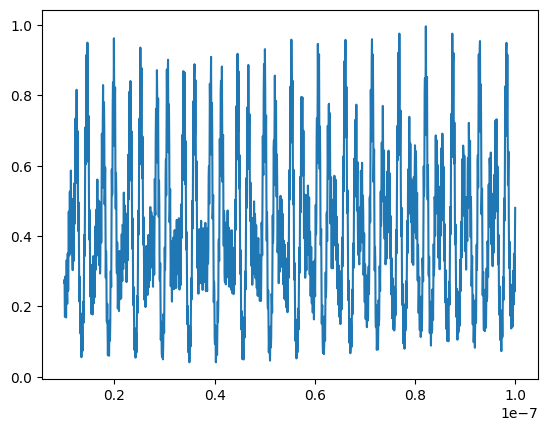

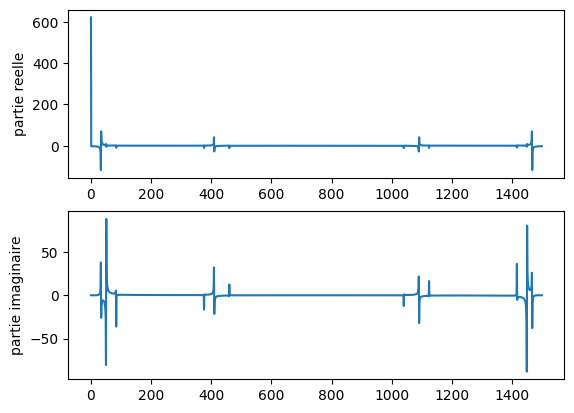

In [11]:
EF_idx = 0
# 2. aller chercher toutes les valeurs à chaque temps pour ce champ electrique
sup = np.zeros(len(dt_values))
pop = np.zeros(len(dt_values))
for i in range(len(dt_values)):
    #sup[i] = l_sup_10_pop[dt_values[i]][EF_idx]
    pop[i] = l3_pop[dt_values[i]][EF_idx]
print(data)
plt.plot(dt_values, pop)
print('len=',len(pop))
# TDF dessus
L_SUP = fft(sup)
POP = fft(pop)

RPOP = rfft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(POP))
plt.ylabel("partie reelle")
#plt.xlim(0,50)
plt.subplot(212)
plt.plot(np.imag(POP))
plt.ylabel("partie imaginaire")
#plt.xlim(0,50)
plt.show()


In [ ]:
RPOP = rfft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(RPOP))
plt.ylabel("partie reelle")
plt.subplot(212)
plt.plot(np.imag(RPOP))
plt.ylabel("partie imaginaire")

plt.show()

In [ ]:
IPOP = ifft(pop)
plt.figure()
plt.subplot(211)
plt.plot(np.real(IPOP))
plt.ylabel("partie reelle")
plt.subplot(212)
plt.plot(np.imag(IPOP))
plt.ylabel("partie imaginaire")
plt.show()

In [ ]:
EF_idx = 18
l34_pop = data['l4_pop'].item()
# 2. aller chercher toutes les valeurs à chaque temps pour ce champ electrique
sup = np.zeros(len(dt_values))
pop = np.zeros(len(dt_values))
for i in range(len(dt_values)):
    #sup[i] = l_sup_10_pop[dt_values[i]][EF_idx]
    pop[i] = l34_pop[dt_values[i]][EF_idx]
print(data)
plt.plot(dt_values, pop)
print('len=',len(pop))
# TDF dessus
L_SUP = fft(sup)
POP = fft(pop)
POP = POP[1:]
print(POP)
print('len=',len(pop))
plt.figure()
plt.subplot(211)
plt.plot(np.real(POP))
plt.ylabel("partie reelle")
plt.xlim(-10,100)
plt.subplot(212)
plt.plot(np.imag(POP))
plt.ylabel("partie imaginaire")
plt.xlim(-10,100)
plt.show()


In [ ]:
dt_signal = 0.062e-10
n = len(pop)-1
FREQ_POP = fftfreq(n,dt_signal)
plt.plot(FREQ_POP,POP.real, label = "real")
plt.plot(FREQ_POP,POP.imag, label = "imag")
plt.legend()
plt.grid()
#plt.xlim(-4,4)
plt.show()

In [ ]:
# definition du signal
dt = 0.62e-3
T1 = 2
T2 = 5
t = np.arange(0, T1*T2, dt)
signal = 2*np.cos(2*np.pi/T1*t) + np.sin(2*np.pi/T2*t)

# affichage du signal
plt.subplot(211)
plt.plot(t,signal)

# calcul de la transformee de Fourier et des frequences
fourier = np.fft.fft(signal)
n = signal.size
freq = np.fft.fftfreq(n, d=dt)

# affichage de la transformee de Fourier
plt.subplot(212)
plt.plot(freq, fourier.real, label="real")
plt.plot(freq, fourier.imag, label="imag")
plt.legend()
plt.xlim(-1,1)

plt.show()